<a href="https://colab.research.google.com/github/angelishhha/ml_course/blob/master/lab3_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
sns.set(style="ticks")

data = pd.read_csv('BlackFriday.csv', sep=",")



In [21]:
data.shape

(248463, 12)

In [22]:
data.dtypes


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [23]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             77060
Product_Category_3            172496
Purchase                           1
dtype: int64

In [24]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [25]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 248463


In [26]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((248463, 12), (248463, 9))

In [27]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((248463, 12), (75967, 12))

In [28]:

data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [29]:
data_new_3 = data.fillna(0)
data_new_3.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [30]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Product_Category_2. Тип данных float64. Количество пустых значений 77060, 31.01%.
Колонка Product_Category_3. Тип данных float64. Количество пустых значений 172496, 69.43%.
Колонка Purchase. Тип данных float64. Количество пустых значений 1, 0.0%.


In [31]:
data_num = data[num_cols]
data_num


,Product_Category_2,Product_Category_3,Purchase
0,NaN,NaN,8370.0
1,6.0,14.0,15200.0
2,NaN,NaN,1422.0
3,14.0,NaN,1057.0
4,NaN,NaN,7969.0
5,2.0,NaN,15227.0
6,8.0,17.0,19215.0
7,15.0,NaN,15854.0
8,16.0,NaN,15686.0
9,NaN,NaN,7871.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


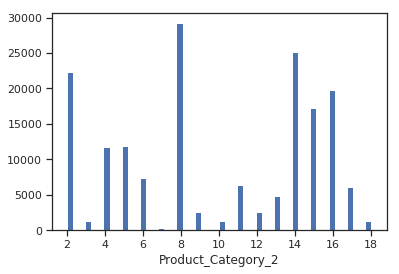

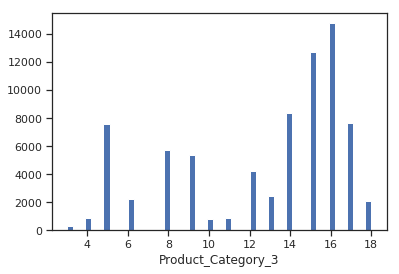

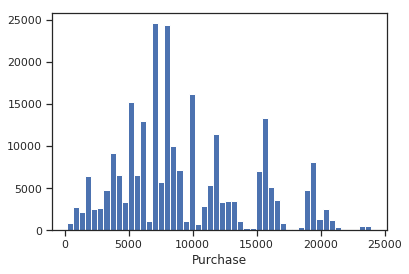

In [32]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [39]:
# Фильтр по пустым значениям поля MasVnrArea 
data[data['Product_Category_2'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957.0
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073.0
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872.0
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743.0
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982.0
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887.0


In [40]:
flt_index = data[data['Product_Category_2'].isnull()].index
flt_index

Int64Index([     0,      2,      4,      9,     11,     12,     21,     22,
                23,     26,
            ...
            248443, 248444, 248447, 248448, 248449, 248451, 248453, 248454,
            248455, 248462],
           dtype='int64', length=77060)

In [41]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957.0
12,1000005,P00031342,M,26-35,20,A,1,1,8,NaN,NaN,6073.0
21,1000008,P00156442,M,26-35,12,C,4+,1,8,NaN,NaN,9872.0
22,1000008,P00213742,M,26-35,12,C,4+,1,8,NaN,NaN,9743.0
23,1000008,P00214442,M,26-35,12,C,4+,1,8,NaN,NaN,5982.0
26,1000009,P00039942,M,26-35,17,C,0,0,8,NaN,NaN,5887.0


In [42]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Product_Category_2']

0        NaN
2        NaN
4        NaN
9        NaN
11       NaN
12       NaN
21       NaN
22       NaN
23       NaN
26       NaN
31       NaN
32       NaN
34       NaN
35       NaN
40       NaN
45       NaN
61       NaN
63       NaN
70       NaN
86       NaN
91       NaN
92       NaN
96       NaN
104      NaN
106      NaN
109      NaN
110      NaN
124      NaN
130      NaN
131      NaN
          ..
248388   NaN
248390   NaN
248391   NaN
248396   NaN
248398   NaN
248400   NaN
248401   NaN
248402   NaN
248403   NaN
248410   NaN
248412   NaN
248414   NaN
248415   NaN
248418   NaN
248419   NaN
248422   NaN
248424   NaN
248425   NaN
248428   NaN
248437   NaN
248443   NaN
248444   NaN
248447   NaN
248448   NaN
248449   NaN
248451   NaN
248453   NaN
248454   NaN
248455   NaN
248462   NaN
Name: Product_Category_2, Length: 77060, dtype: float64

In [43]:
data_num_Product_Category_2 = data_num[['Product_Category_2']]
data_num_Product_Category_2.head()

,Product_Category_2
0,NaN
1,6.0
2,NaN
3,14.0
4,NaN


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [45]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Product_Category_2)
mask_missing_values_only

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [46]:
strategies=['mean', 'median','most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Product_Category_2)
    return data_num_imp[mask_missing_values_only]
  
  
strategies[0], test_num_impute(strategies[0])

('mean',
 array([9.84916833, 9.84916833, 9.84916833, ..., 9.84916833, 9.84916833,
        9.84916833]))

In [47]:
strategies[1], test_num_impute(strategies[1])

('median', array([9., 9., 9., ..., 9., 9., 9.]))

In [48]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([8., 8., 8., ..., 8., 8., 8.]))

In [51]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1] 
  
  
data[['Product_Category_3']].describe()

,Product_Category_3
count,75967.000000
mean,12.655995
std,4.128461
min,3.000000
25%,9.000000
50%,14.000000
75%,16.000000
max,18.000000


In [52]:
test_num_impute_col(data, 'Product_Category_3', strategies[0])

('Product_Category_3', 'mean', 172496, 12.6559953664091, 12.6559953664091)

In [53]:
test_num_impute_col(data, 'Product_Category_3', strategies[1])

('Product_Category_3', 'median', 172496, 14.0, 14.0)

In [54]:
test_num_impute_col(data, 'Product_Category_3', strategies[2])

('Product_Category_3', 'most_frequent', 172496, 16.0, 16.0)